## test+train全用上

In [1]:
from os import listdir
from os.path import isfile, isdir, join
from collections import Counter
import csv
import numpy
import pandas as pd
from gensim.models.word2vec import Word2Vec
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


from data_preprocess import content_fraction
from Dataloader import dataloader

In [2]:
train_data_path = "..\Case_Presentation_1_Data\Train_Textual\\"
test_data_path  = "..\Case_Presentation_1_Data\Test_Intuitive\\"

train_data = dataloader(train_data_path)
test_data  = dataloader(test_data_path)

In [3]:
print(train_data.text_list[0])

['discharg', 'summari', 'unsign', 'admiss', 'date', 'report', 'statu', 'unsign', 'discharg', 'date', 'discharg', 'diagnosi', 'coronari', 'arteri', 'diseas', 'unstabl', 'angina', 'histori', 'present', 'ill', 'hoopl', 'old', 'woman', 'statu', 'post', 'doubl', 'coronari', 'arteri', 'bypass', 'graft', 'endarterectomi', 'fourteen', 'year', 'ago', 'develop', 'angina', 'six', 'month', 'ago', 'suffer', 'unstabl', 'angina', 'sever', 'day', 'coronari', 'catheter', 'result', 'show', 'sever', 'occlus', 'saphen', 'vein', 'graft', 'occlus', 'left', 'anterior', 'descend', 'echocardiogram', 'show', 'excel', 'left', 'ventricular', 'function', 'intraaort', 'balloon', 'pump', 'place', 'reliev', 'intract', 'angina', 'past', 'medic', 'histori', 'signific', 'chest', 'pain', 'short', 'breath', 'admit', 'talc', 'commun', 'medic', 'center', 'catheter', 'coronari', 'arteri', 'bypass', 'graft', 'coronari', 'endarterectomi', 'no', 'chest', 'pain', 'six', 'month', 'prior', 'admiss', 'time', 'inder', 'aspirin', 'si

### 取train data中非肥胖的data

In [4]:
model = Word2Vec(train_data.text_list[200:400]+test_data.text_list[200:400])

In [5]:
def similar(w2v_model, word, target, topn=10):
        try:
            return w2v_model.wv.similarity(word, target)
        except:
            return 0

In [6]:
def most_similar(w2v_model, words, topn=50):
    similar_df = pd.DataFrame()
    for word in words:
        try:
            similar_words = pd.DataFrame(w2v_model.wv.most_similar(word, topn=topn), columns=[word, 'cos'])
            similar_df = pd.concat([similar_df, similar_words], axis=1)
        except:
            print(word, "not found in Word2Vec model!")
    return similar_df

In [7]:
print(most_similar(model, ["not"]))

                   not       cos
0                brief  0.810683
1   treatmentsprocedur  0.803357
2                could  0.783420
3                 none  0.771339
4             endoscop  0.754287
5               detail  0.738297
6             reproduc  0.735937
7                resum  0.717200
8    pericardiocentesi  0.701829
9               applic  0.696396
10               taken  0.690885
11               drive  0.685846
12            procedur  0.683053
13              though  0.681979
14                oper  0.680544
15       arthrocentesi  0.672568
16                felt  0.666656
17              cather  0.654333
18               think  0.652535
19             complet  0.643711
20               refer  0.640845
21             conting  0.640519
22            descript  0.634690
23             anticip  0.633131
24             brought  0.631633
25                upon  0.627857
26               drink  0.627191
27             uncompl  0.626647
28                 cbd  0.624709
29        

In [8]:
print(most_similar(model, ["hypercholesterolemia"]))

   hypercholesterolemia       cos
0           hypothyroid  0.974503
1        hyperlipidemia  0.961047
2            neuropathi  0.959310
3                  iddm  0.957886
4             hypertens  0.947212
5           retinopathi  0.945777
6              arthriti  0.941097
7            rheumatoid  0.939666
8         insulindepend  0.937885
9                reflux  0.936417
10        gastroesophag  0.930013
11            hyperchol  0.926645
12              mellitu  0.923413
13               seizur  0.923076
14              bipolar  0.922982
15             nephriti  0.915599
16                  htn  0.913366
17               disord  0.912117
18                adult  0.912041
19                niddm  0.906712
20                  icd  0.905155
21               asthma  0.902279
22              depress  0.902200
23                  osa  0.898812
24           noninsulin  0.898111
25                 gout  0.895338
26                 gerd  0.894124
27            longstand  0.893233
28       cardi

## 計分方式

In [9]:
def score(datakind, gap, target_word):
    score=0
    total = 0
    for text in datakind:
        for word in text:
            if similar(model, word,  target_word)>gap:
                score+=similar(model, word, target_word)
        total+=score
        score=0
    average = total/200
    return average

In [10]:
gap = 0.85
target_word = "hypercholesterolemia"

# Train data

## 不肥胖

In [11]:
train_unfat_score = score(train_data.text_list[0:200], gap, target_word)
print("train_unfat_score: ",train_unfat_score)

train_unfat_score:  8.959987502098084


## 肥胖

In [12]:
train_fat_score = score(train_data.text_list[200:400], gap, target_word)
print("train_fat_score: ",train_fat_score)

train_fat_score:  10.295676111578942


# Test data

## 不肥胖

In [13]:
test_unfat_score = score(test_data.text_list[0:200], gap, target_word)
print("test_unfat_score: ",test_unfat_score)

test_unfat_score:  8.513201183080673


## 肥胖

In [14]:
test_fat_score =score(test_data.text_list[200:400], gap, target_word)
print("test_fat_score: ",test_fat_score)

test_fat_score:  10.664034923911094


In [15]:
upper = (train_fat_score+test_fat_score)/2
print("upper: ",upper)

upper:  10.479855517745019


In [16]:
lower =  (train_unfat_score+test_unfat_score)/2
print("lower: ",lower)

lower:  8.736594342589378


In [17]:
standard = (upper+lower)/2
print("standard: ",standard)

standard:  9.608224930167198


# Validation

In [18]:
validation_data_path  = "..\Case_Presentation_1_Data\Validation\\"
validation_data  = dataloader(validation_data_path)

In [19]:
score(validation_data.text_list, gap, target_word)

2.099488825201988

In [20]:
score=0
ans = []
for text in validation_data.text_list:
    for word in text:
        if similar(model, word,  target_word)>gap:
            score+=similar(model, word, target_word)
    if score>standard:
        ans.append(0)
    else:
        ans.append(1)
    score=0

print(len(ans))

50


In [21]:
print(ans)

[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1]


In [22]:
len(validation_data.text_list)

50

In [23]:
for i in ans:
    print(i)

0
0
0
0
1
1
1
1
0
1
0
1
1
1
0
0
0
1
1
1
1
1
1
0
1
0
1
1
1
1
1
0
1
0
1
0
1
0
0
1
1
1
0
0
1
1
0
1
0
1


# confusion matrix & F1-score

In [24]:
from sklearn.metrics import confusion_matrix

def f1(C):
    return C[0][0]/(C[0][1]+C[1][0])

In [25]:
def confusionMatix(matric):

    sns.set()
    f,ax=plt.subplots()
    #y_true = label
    #y_pred = ans
    C2= matric
    print(C2) #打印出來看看
    sns.heatmap(C2,annot=True,ax=ax) #畫熱力圖

    ax.set_title('confusion matrix') #標題
    ax.set_xlabel('predict') #x軸
    ax.set_ylabel('true') #y軸

## train data

In [26]:
validation_data_path  = "..\Case_Presentation_1_Data\Train_Textual\\"
validation_data  = dataloader(validation_data_path)
score=0
ans = []
for text in validation_data.text_list:
    for word in text:
        if similar(model, word,  target_word)>gap:
            score+=similar(model, word, target_word)
    if score>standard:
        ans.append(0)
    else:
        ans.append(1)
    score=0

In [27]:
y_true = train_data.label_list
y_pred = ans

C = confusion_matrix(y_true, y_pred)
C_float = numpy.empty((2,2), dtype=float)

for i in range(2):
    for j in range(2):
        C_float[i][j] = float(C[i][j])/200

print(f1(C))
print(C_float)

0.3607305936073059
[[0.395 0.605]
 [0.49  0.51 ]]


[[0.395 0.605]
 [0.49  0.51 ]]


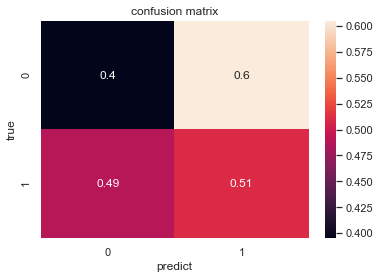

In [28]:
confusionMatix(C_float)

## test data

In [29]:
validation_data_path  = "..\Case_Presentation_1_Data\Test_Intuitive\\"
validation_data  = dataloader(validation_data_path)
score=0
ans = []
for text in validation_data.text_list:
    for word in text:
        if similar(model, word,  target_word)>gap:
            score+=similar(model, word, target_word)
    if score>standard:
        ans.append(0)
    else:
        ans.append(1)
    score=0

In [30]:
y_true = test_data.label_list
y_pred = ans

C = confusion_matrix(y_true, y_pred)
C_float = numpy.empty((2,2), dtype=float)

for i in range(2):
    for j in range(2):
        C_float[i][j] = float(C[i][j])/200

print(f1(C))
print(C_float)

0.3333333333333333
[[0.38 0.62]
 [0.52 0.48]]


[[0.38 0.62]
 [0.52 0.48]]


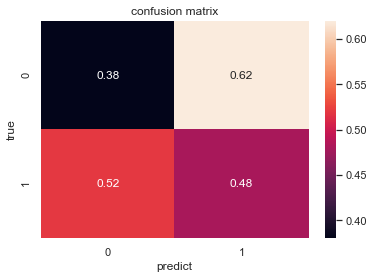

In [31]:
confusionMatix(C_float)